In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# In ekra we can build the two types of models that is sequential model and non- sequential model
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))#Input Layer, we are having the 11 input columns
model.add(Dense(11,activation='sigmoid'))#Hidden Layer
model.add(Dense(1,activation='sigmoid'))#output layer

In [ ]:
# this gives the summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# here we are compiling the model using the optimizer and loss, this is a binary classification , so we are using the binary cross entropy aqs loss
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7958 - val_loss: 0.5014 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7958 - val_loss: 0.5015 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7958 - val_loss: 0.5011 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7958 - val_loss: 0.5011 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7958 - val_loss: 0.5012 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7958 - val_loss: 0.5012 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7958 - val_loss: 0.5011 - val_accuracy: 0.7969

In [ ]:
model.layers[0].get_weights()

[array([[ 0.0032767 , -0.33820978, -0.16031079,  0.2782848 , -0.26205185,
         -0.01753664, -0.22641125, -0.15644331,  0.3803712 ,  0.53698343,
          0.25644982],
        [-0.437487  , -0.46093133, -0.10845587, -0.05305868, -0.4004853 ,
          0.1549034 ,  0.04766322, -0.30686665,  0.3900932 ,  0.17805602,
         -0.22708613],
        [ 0.47077242, -0.16586637,  0.7253781 , -0.00384117, -0.0290815 ,
         -0.11316653, -0.07083761,  0.49583244, -0.03810108,  0.51426506,
         -0.39056522],
        [ 0.43755496,  0.03086731, -0.07595119, -0.01027741,  0.52166325,
          0.18727964,  0.0055179 ,  0.35766864,  0.13438904, -0.29054904,
          0.04414642],
        [-0.2967796 ,  0.28735477,  0.13139632, -0.152753  ,  0.5208108 ,
          0.42209756, -0.27410084, -0.03863442,  0.0095554 ,  0.14183667,
         -0.32243532],
        [ 0.29409376,  0.17866224, -0.0712819 ,  0.40410745,  0.35256463,
          0.49338788, -0.65556014,  0.44467506, -0.26061708,  0.396227 

In [ ]:
#here we are predicting the model
y_log = model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_pred = y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

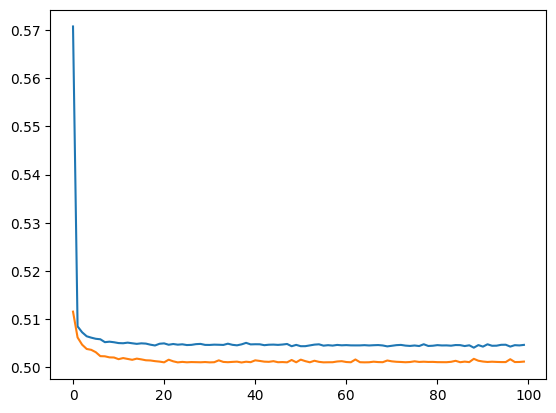

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

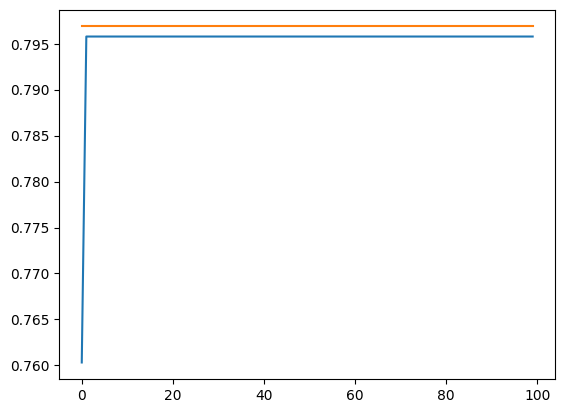

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])